#Word2Vec-CBow(Continuous Bag of Words) 방법 구현

### 데이터 입력

In [2]:
doc = 'you will never know untill you try'

In [3]:
tokens = doc.split()
tokens

['you', 'will', 'never', 'know', 'untill', 'you', 'try']

###유니크 토큰 원핫인코딩

In [4]:
word2index = {}
for voca in tokens :
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
print(word2index)


{'you': 0, 'will': 1, 'never': 2, 'know': 3, 'untill': 4, 'try': 5}


In [5]:
def one_hot_encoding(word, word2index) :
    one_hot_vector = [0] * (len(word2index))
    index = word2index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

In [6]:
for voca in word2index :
    one_hot_vector = one_hot_encoding(voca, word2index)
    print(voca)
    print(one_hot_vector)

you
[1, 0, 0, 0, 0, 0]
will
[0, 1, 0, 0, 0, 0]
never
[0, 0, 1, 0, 0, 0]
know
[0, 0, 0, 1, 0, 0]
untill
[0, 0, 0, 0, 1, 0]
try
[0, 0, 0, 0, 0, 1]


##Feed Forwoard

###가중치 초기화

In [7]:
import numpy as np
import random

H = 4

W_1 = np.random.rand(len(word2index), H)
W_2 = np.random.rand(H, len(word2index))

###X : 핵심단어의 주변 원핫벡터 리스트
###Y : 핵심단어 리스트

In [8]:
X_tokens = [] # 보여주기용
Y_tokens = [] # 보여주기용
X = []
Y = []

window_size = 1 # 2n

#윈도우 사이즈만큼 tokens에서 주변 원핫벡터 가져오기
for token_idx in range(len(tokens)) :
    for i in range(1, window_size+1) : #윈도우 사이즈만큼 전방탐색
        if token_idx - i >= 0 :
            X_tokens.append(tokens[token_idx - i])
            Y_tokens.append(tokens[token_idx])
            X.append(one_hot_encoding(tokens[token_idx - i],word2index))
            Y.append(one_hot_encoding(tokens[token_idx],word2index))
    for j in range(1, window_size+1) : #윈도우 사이즈만큼 후방탐색
        if token_idx + j <= len(tokens) -1 :
            X_tokens.append(tokens[token_idx + j])
            Y_tokens.append(tokens[token_idx])
            X.append(one_hot_encoding(tokens[token_idx + j],word2index))
            Y.append(one_hot_encoding(tokens[token_idx],word2index))


In [9]:
print(X)
print(X_tokens)
print(len(X))

[[0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0]]
['will', 'you', 'never', 'will', 'know', 'never', 'untill', 'know', 'you', 'untill', 'try', 'you']
12


In [10]:
print(Y)
print(Y_tokens)
print(len(Y))

[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1]]
['you', 'will', 'will', 'never', 'never', 'know', 'know', 'untill', 'untill', 'you', 'you', 'try']
12


###hidden_node 리스트
hidden_node = np.dot(W_1.T, X)

In [11]:
hidden_node_ls = np.dot(X, W_1)
hidden_node_ls

array([[0.93404354, 0.0707274 , 0.55513235, 0.87780034],
       [0.13717058, 0.50712765, 0.00163324, 0.40055294],
       [0.34095888, 0.78962506, 0.35695133, 0.50569227],
       [0.93404354, 0.0707274 , 0.55513235, 0.87780034],
       [0.49475739, 0.15791705, 0.33449369, 0.13630715],
       [0.34095888, 0.78962506, 0.35695133, 0.50569227],
       [0.2666887 , 0.27532555, 0.59902175, 0.87297065],
       [0.49475739, 0.15791705, 0.33449369, 0.13630715],
       [0.13717058, 0.50712765, 0.00163324, 0.40055294],
       [0.2666887 , 0.27532555, 0.59902175, 0.87297065],
       [0.1720553 , 0.32108451, 0.02094638, 0.57118096],
       [0.13717058, 0.50712765, 0.00163324, 0.40055294]])

### output 리스트

output을 계산할 소프트맥스 함수

In [14]:
def softmax(a):
    return np.exp(a) /np.sum(np.exp(a), axis=1, keepdims=True)#np.exp(a) / np.sum(np.exp(a))

output = softmax(np.dot(W_2.T, hidden_node)

In [15]:
output_ls = np.dot(hidden_node_ls, W_2)
result = softmax(output_ls)
result

array([[0.13763172, 0.14566871, 0.16819966, 0.20203045, 0.12083934,
        0.22563012],
       [0.18539867, 0.15957502, 0.18295394, 0.13725776, 0.14373823,
        0.19107638],
       [0.16816431, 0.16893631, 0.208056  , 0.14257363, 0.12923884,
        0.18303092],
       [0.13763172, 0.14566871, 0.16819966, 0.20203045, 0.12083934,
        0.22563012],
       [0.13827283, 0.18432074, 0.17175555, 0.18266832, 0.1426893 ,
        0.18029325],
       [0.16816431, 0.16893631, 0.208056  , 0.14257363, 0.12923884,
        0.18303092],
       [0.17143465, 0.12631857, 0.20830088, 0.18366138, 0.13645457,
        0.17382994],
       [0.13827283, 0.18432074, 0.17175555, 0.18266832, 0.1426893 ,
        0.18029325],
       [0.18539867, 0.15957502, 0.18295394, 0.13725776, 0.14373823,
        0.19107638],
       [0.17143465, 0.12631857, 0.20830088, 0.18366138, 0.13645457,
        0.17382994],
       [0.18824847, 0.14408139, 0.17714315, 0.14711408, 0.14441242,
        0.19900049],
       [0.18539867, 0

###Y_hat

In [16]:
Y_hat_ls = np.zeros((len(output_ls), len(output_ls[0])))
for idx, output in enumerate(output_ls) :
     one_hot_index = output.argsort()[-1] #최대값 인덱스
     Y_hat_ls[idx][one_hot_index] = 1
Y_hat_ls 

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

###Loss Function

In [17]:
loss = -np.multiply(Y, np.log(output_ls)).sum()/len(X)
loss

0.2646674173934809

###가중치 업데이트

In [18]:
#ppt식과 np.dot((output_ls- Y), W_2.T) 다름
dW_1 = np.dot(np.array(X).T, np.dot((output_ls- Y), W_2.T)) 
dW_1

array([[2.25683472, 3.33439586, 3.54656724, 5.32120103],
       [6.13431381, 5.427332  , 6.58463616, 8.8761949 ],
       [3.62620863, 4.88697264, 4.63608886, 7.43341913],
       [2.40455517, 1.82506336, 1.96557183, 2.8059893 ],
       [4.55577958, 5.29707947, 5.781182  , 7.87433044],
       [1.33649962, 1.14301172, 1.44611765, 1.68091797]])

In [19]:
dW_2 = np.dot(hidden_node_ls.T, output_ls - Y)
dW_2

array([[2.74950806, 3.76712455, 3.5158721 , 4.26524389, 2.82680123,
        5.25826161],
       [3.10678791, 2.10100218, 4.04584556, 2.09187482, 2.08662601,
        3.62568051],
       [2.42383728, 3.12672172, 3.46104678, 3.2134449 , 2.6712157 ,
        4.40205719],
       [3.99843152, 4.73060094, 6.22219668, 5.14270771, 4.44168416,
        7.03786838]])

In [20]:
learning_rate = 0.1
W_1 -= learning_rate * dW_1
W_2 -= learning_rate * dW_2


In [21]:
for i in range(10000) :

    for idx, x in enumerate(X) :
        hidden_node_ls[idx] = np.dot(W_1.T, x)
    
    for idx, hidden_node in enumerate(hidden_node_ls) :
        output_ls[idx] = np.dot(W_2.T, hidden_node)
    
    output_ls = softmax(output_ls)

    loss = -np.multiply(Y, np.log(output_ls)).sum()

    dW_1 = np.dot(np.array(X).T, np.dot((output_ls- Y), W_2.T)) 
    dW_2 = np.dot(hidden_node_ls.T, output_ls - Y)

    W_1 -= learning_rate * dW_1
    W_2 -= learning_rate * dW_2

    Y_hat_ls = np.zeros((len(output_ls), len(output_ls[0])))
    
    for idx, output in enumerate(output_ls) :
        one_hot_index = output.argsort()[-1] #최대값 인덱스
        Y_hat_ls[idx][one_hot_index] = 1
 

    if i%1000 == 0 :
        print("output_ls : {}".format(output_ls))

        print("loss : {}".format(loss))

        print("Y_hat_ls : {}".format(Y_hat_ls))

        print("W_1 : {}".format(W_1))

output_ls : [[0.1525731  0.16072272 0.14453762 0.1834693  0.16443501 0.19426226]
 [0.17133917 0.17901964 0.15567251 0.13859588 0.16357352 0.19179928]
 [0.15694819 0.19634054 0.16779222 0.14731054 0.16231668 0.16929183]
 [0.1525731  0.16072272 0.14453762 0.1834693  0.16443501 0.19426226]
 [0.14510588 0.18723919 0.16487447 0.17758414 0.16209932 0.163097  ]
 [0.15694819 0.19634054 0.16779222 0.14731054 0.16231668 0.16929183]
 [0.17554653 0.14217687 0.16898546 0.17899018 0.17345357 0.16084739]
 [0.14510588 0.18723919 0.16487447 0.17758414 0.16209932 0.163097  ]
 [0.17133917 0.17901964 0.15567251 0.13859588 0.16357352 0.19179928]
 [0.17554653 0.14217687 0.16898546 0.17899018 0.17345357 0.16084739]
 [0.200195   0.1521266  0.15932381 0.1479112  0.1615462  0.1788972 ]
 [0.17133917 0.17901964 0.15567251 0.13859588 0.16357352 0.19179928]]
loss : 21.230358123661958
Y_hat_ls : [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 

#class화

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Word2Vec_CBow() : 
    
    def __init__(self, H = 4, learning_rate = 0.1) :
        self.H = H
        self.learning_rate = learning_rate
        self.loss_ls = [] #loss 변화량 그래프로 보여주기위한 리스트
        return
    
    def tokenize(self, doc) : # 토크나이즈 수정
        tokens = doc.split()
        return tokens

    def word_indexing(self,tokens) :
        word2index = {}
        for voca in tokens :
            if voca not in word2index.keys():
                word2index[voca] = len(word2index)
        return word2index

    def one_hot_encoding(self, word, word2index) :
        one_hot_vector = [0] * (len(word2index))
        index = word2index[word]
        one_hot_vector[index] = 1
        return one_hot_vector
    
    def set_data(self, tokens, word2index, window_size = 1) :
        X = []
        Y = []

        #윈도우 사이즈만큼 tokens에서 주변 원핫벡터 가져오기
        for token_idx in range(len(tokens)) :
            for i in range(1, window_size+1) : #윈도우 사이즈만큼 전방탐색
                if token_idx - i >= 0 :
                    X.append(self.one_hot_encoding(tokens[token_idx - i],word2index))
                    Y.append(self.one_hot_encoding(tokens[token_idx],word2index))
            for j in range(1, window_size+1) : #윈도우 사이즈만큼 후방탐색
                if token_idx + j <= len(tokens) -1 :
                    X.append(self.one_hot_encoding(tokens[token_idx + j],word2index))
                    Y.append(self.one_hot_encoding(tokens[token_idx],word2index))
        return X, Y
    
    def init_weight(self, X, word2index):

        W_1 = np.random.rand(len(word2index), self.H)
        W_2 = np.random.rand(self.H, len(word2index))

        hidden_node_ls = np.dot(X, W_1)
        
        output_ls = np.dot(hidden_node_ls, W_2)
        output_ls = self.softmax(output_ls)
        
        return W_1, W_2, hidden_node_ls, output_ls

    def softmax(self, a):
        return np.exp(a) /np.sum(np.exp(a), axis=1, keepdims=True)#np.exp(a) / np.sum(np.exp(a))

    def weight_update(self, X, Y, W_1, W_2, hidden_node_ls, output_ls) :

        temp = np.dot((output_ls- Y), W_2.T)

        dW_1 = np.dot(np.array(X).T, temp) 
        dW_2 = np.dot(hidden_node_ls.T, (output_ls - Y))

        
        W_1 -= self.learning_rate * dW_1
        W_2 -= self.learning_rate * dW_2

        hidden_node_ls = np.dot(X, W_1)
        
        output_ls = np.dot(hidden_node_ls, W_2)
        output_ls = self.softmax(output_ls)

        loss = -np.multiply(Y, np.log(output_ls)).sum()

        return output_ls, W_1, W_2, hidden_node_ls, loss
    
    def optimize(self, doc, epoch = 10000) :
        tokens = self.tokenize(doc)
        word2index = self.word_indexing(tokens)
        X, Y = self.set_data(tokens, word2index, window_size = 1)

        W_1, W_2, hidden_node_ls, output_ls = self.init_weight(X, word2index)
        

        for i in range(epoch) :
    
            output_ls, W_1, W_2, hidden_node_ls, loss = self.weight_update(X, Y, W_1, W_2, hidden_node_ls, output_ls)
            self.loss_ls.append(loss)
        
        Y_hat_ls = np.zeros((len(output_ls), len(output_ls[0])))
        for idx, output in enumerate(output_ls) :
            one_hot_index = output.argsort()[-1] #최대값 인덱스
            Y_hat_ls[idx][one_hot_index] = 1
        
        print(Y_hat_ls)
        print(Y)
        print("loss : {}".format(loss))

    def loss_graph(self):
        plt.plot(self.loss_ls)
        plt.title('Loss')
        plt.show()

In [23]:
doc = 'you will never know untill you try'
test = Word2Vec_CBow()
test.optimize(doc, 1000)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1]]
loss : 8.845216264282854


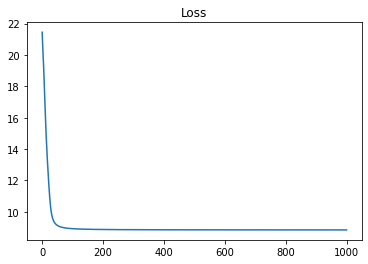

In [24]:
test.loss_graph()